In [1]:
###Import standard packages###
import numpy as np
from scipy import io

###Import functions for binning data for preprocessing###
from preprocessing_funcs import bin_spikes
from preprocessing_funcs import bin_output

In [2]:
###Load Data###
folder='/Users/jig289/Dropbox/MATLAB/Projects/In_Progress/BMI/Processed_Data/'
data=io.loadmat(folder+'m1_data_raw.mat')
# data=io.loadmat(folder+'s1_data_raw.mat')
# data=io.loadmat(folder+'hc_data_raw.mat')
spike_times=data['spike_times']
vels=data['vels']
vel_times=data['vel_times']
pos=data['pos']
# pos_times=data['pos_times']
acc=data['acc']



#Make spike_times an array of arrays (raw format has extra unnecessary dimension)
spike_times=np.squeeze(spike_times)
for i in range(spike_times.shape[0]):
    spike_times[i]=np.squeeze(spike_times[i])

In [3]:
###User Options For Initial Preprocessing###
dt=.05 #Size of time bins
t_start=30 #Time to start extracting data
t_end=1295 #Time to finish extracting data
downsample_factor=10 #Downsampling of output (to make binning go faster)

# dt=.05 #Size of time bins
# t_start=vel_times[0] #Time to start extracting data
# t_end=vel_times[-1] #Time to finish extracting data
# downsample_factor=1 #Downsampling of output (to make binning go faster)

# dt=.2 #Size of time bins
# t_start=0 #Time to start extracting data
# t_end=5608 #Time to finish extracting data
# downsample_factor=1 #Downsampling of output (to make binning go faster)

In [4]:
###Preprocessing to put spikes and output in bins###

#Bin neural data#
neural_data=bin_spikes(spike_times,dt,t_start,t_end)

#Bin output (velocity) data#
vels_binned=bin_output(vels,vel_times,dt,t_start,t_end,downsample_factor)
pos_binned=bin_output(pos,vel_times,dt,t_start,t_end,downsample_factor)
acc_binned=bin_output(acc,vel_times,dt,t_start,t_end,downsample_factor)



In [5]:
import pickle

# with open('s1_test_data.pickle','w') as f:
#     pickle.dump([neural_data,vels_binned,pos_binned,acc_binned],f)

with open('m1_test_data_p3.pickle','wb') as f:
    pickle.dump([neural_data,vels_binned,pos_binned,acc_binned],f)

# with open('hc_test_data.pickle','w') as f:
#     pickle.dump([neural_data,pos_binned],f)

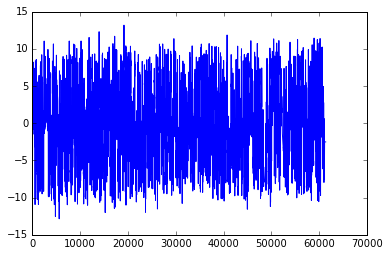

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pos_binned[:,0])